# Predicting the condition of water wells in Tanzania

<img src="./images/water_fill.jpg" 
     align="left" 
     width="400" />

### Data Preparation

In [1]:
#Imports
import pandas as pd
import numpy as np

In [2]:
#Loading data
test_set_values = pd.read_csv('Data/test_set_values.csv')
training_set_labels = pd.read_csv('Data/training_set_labels.csv')
training_set_values = pd.read_csv('Data/training_set_values.csv')


#### Merging training set values and training set labels 

In [3]:
#inner merge
training_all = pd.merge(training_set_values, training_set_labels, on='id', how='inner')

In [4]:
training_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

### Data Cleaning - dealing with N/A values and removing unnecessary data columns

In [5]:
training_all.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantity_group                source  \
0          good        enough          enough                spring   
1          good  insufficient    insufficient  rainwater harvesting   
2          good        enough          enough                   dam   
3          good           dry             dry           machine dbh   
4          good      seasonal        seasonal  rainwater harvesting   

            source_type source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3              borehole  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

  waterpoint_type_group    status_group  
0    communal standpipe      functional  
1    communal standpipe      functional  
2    communal standpipe      functional  
3    communal standpipe  non functional  
4    communal standpipe      functional  

[5 rows x 41 columns]

In [6]:
#Dropping the num_private column because there is no data on what this column means on the website source of the data
training_all.drop(columns='num_private', inplace=True)

In [7]:
# Replace specific values in the 'installer' column
training_all['installer'] = training_all['installer'].replace('Hesawa', 'HESAWA')
training_all['installer'] = training_all['installer'].replace('DANID', 'DANIDA')
training_all['installer'] = training_all['installer'].replace('Commu', "Community")

In [8]:
#changing the name of some the columns so they are more intuitive
training_all.rename(columns={'gps_height': 'well_altitude'}, inplace=True)
training_all.rename(columns={'wpt_name': 'water_point_name'}, inplace=True)
training_all.rename(columns={'payment': 'payment_type'}, inplace=True)
training_all.rename(columns={'payment_type': 'frequency_of_payment'}, inplace=True)
training_all.rename(columns={'funder': 'funding_source'}, inplace=True)


In [9]:
# Changing three options for functioning status of wells to two options - functional or needing repair
to_replace = ['functional needs repair']
new_value = 'functional'
training_all['status_group'] = training_all['status_group'].replace(to_replace, new_value)

In [10]:
training_all.head()

id  amount_tsh date_recorded funding_source  well_altitude  \
0  69572      6000.0    2011-03-14          Roman           1390   
1   8776         0.0    2013-03-06        Grumeti           1399   
2  34310        25.0    2013-02-25   Lottery Club            686   
3  67743         0.0    2013-01-28         Unicef            263   
4  19728         0.0    2011-07-13    Action In A              0   

      installer  longitude   latitude      water_point_name  \
0         Roman  34.938093  -9.856322                  none   
1       GRUMETI  34.698766  -2.147466              Zahanati   
2  World vision  37.460664  -3.821329           Kwa Mahundi   
3        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu   
4       Artisan  31.130847  -1.825359               Shuleni   

                     basin  ... water_quality quality_group      quantity  \
0               Lake Nyasa  ...          soft          good        enough   
1            Lake Victoria  ...          soft          good  insufficient   
2                  Pangani  ...          soft          good        enough   
3  Ruvuma / Southern Coast  ...          soft          good           dry   
4            Lake Victoria  ...          soft          good      seasonal   

   quantity_group                source           source_type  source_class  \
0          enough                spring                spring   groundwater   
1    insufficient  rainwater harvesting  rainwater harvesting       surface   
2          enough                   dam                   dam       surface   
3             dry           machine dbh              borehole   groundwater   
4        seasonal  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group    status_group  
0           communal standpipe    communal standpipe      functional  
1           communal standpipe    communal standpipe      functional  
2  communal standpipe multiple    communal standpipe      functional  
3  communal standpipe multiple    communal standpipe  non functional  
4           communal standpipe    communal standpipe      functional  

[5 rows x 40 columns]

In [11]:
training_all.dropna(subset=['latitude'], inplace=True)
training_all.dropna(subset=['longitude'], inplace=True)
training_all = training_all.loc[training_all['longitude'] != 0]
training_all = training_all.loc[training_all['latitude'] != 0]

## Scheme Management - who operates the waterpoint

In [12]:
mgmt = training_all

In [13]:
mgmt['scheme_management'].value_counts()

VWC                 36143
WUG                  4249
Water authority      3151
WUA                  2882
Water Board          2747
Parastatal           1607
Private operator     1063
Company              1061
Other                 765
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [14]:
mgmt.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funding_source            3622
well_altitude                0
installer                 3636
longitude                    0
latitude                     0
water_point_name             0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2976
recorded_by                  0
scheme_management         3750
scheme_name              26692
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
frequency_of_payment         0
frequency_of_payment         0
water_quality                0
quality_group                0
quantity

In [15]:
# drop n/a
mgmt.dropna(subset=['scheme_management'], inplace=True)

In [16]:
# drop "None" and "Other" values
mgmt = mgmt.loc[mgmt['scheme_management'] != 'None']
mgmt = mgmt.loc[mgmt['scheme_management'] != 'Other']

In [17]:
mgmt['status_group'].value_counts()

functional        32796
non functional    20276
Name: status_group, dtype: int64

In [18]:
# Encode scheme management column using one-hot encoding
mgmt_dummy = pd.get_dummies(mgmt, columns=['scheme_management'], prefix='scheme')
mgmt_dummy.head()

id  amount_tsh date_recorded       funding_source  well_altitude  \
0  69572      6000.0    2011-03-14                Roman           1390   
2  34310        25.0    2013-02-25         Lottery Club            686   
3  67743         0.0    2013-01-28               Unicef            263   
5   9944        20.0    2011-03-13  Mkinga Distric Coun              0   
6  19816         0.0    2012-10-01                 Dwsp              0   

      installer  longitude   latitude      water_point_name  \
0         Roman  34.938093  -9.856322                  none   
2  World vision  37.460664  -3.821329           Kwa Mahundi   
3        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu   
5           DWE  39.172796  -4.765587                Tajiri   
6          DWSP  33.362410  -3.766365            Kwa Ngomho   

                     basin  ... scheme_Company scheme_Parastatal  \
0               Lake Nyasa  ...              0                 0   
2                  Pangani  ...              0                 0   
3  Ruvuma / Southern Coast  ...              0                 0   
5                  Pangani  ...              0                 0   
6                 Internal  ...              0                 0   

   scheme_Private operator  scheme_SWC scheme_Trust scheme_VWC  scheme_WUA  \
0                        0           0            0          1           0   
2                        0           0            0          1           0   
3                        0           0            0          1           0   
5                        0           0            0          1           0   
6                        0           0            0          1           0   

  scheme_WUG scheme_Water Board scheme_Water authority  
0          0                  0                      0  
2          0                  0                      0  
3          0                  0                      0  
5          0                  0                      0  
6          0                  0                      0  

[5 rows x 49 columns]

In [19]:
mgmt_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53072 entries, 0 to 59399
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       53072 non-null  int64  
 1   amount_tsh               53072 non-null  float64
 2   date_recorded            53072 non-null  object 
 3   funding_source           49500 non-null  object 
 4   well_altitude            53072 non-null  int64  
 5   installer                49502 non-null  object 
 6   longitude                53072 non-null  float64
 7   latitude                 53072 non-null  float64
 8   water_point_name         53072 non-null  object 
 9   basin                    53072 non-null  object 
 10  subvillage               52709 non-null  object 
 11  region                   53072 non-null  object 
 12  region_code              53072 non-null  int64  
 13  district_code            53072 non-null  int64  
 14  lga                   

In [20]:
mgmt_dummy.drop(columns='date_recorded', inplace=True)

In [21]:
# model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target (y)
X = mgmt_dummy[['scheme_Company', 'scheme_Parastatal', 'scheme_Private operator', 'scheme_SWC', 'scheme_Trust', 'scheme_WUA', 'scheme_WUG', 'scheme_Water Board', 'scheme_Water authority']]  # Drop the target column
y = mgmt_dummy['status_group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.61


## Installer

In [22]:
# Replace 'installer' with the actual column name
installer_counts = training_all['installer'].value_counts()

# Get installer types with less than 2 instances
installers_to_remove = installer_counts[installer_counts < 500].index

# Filter the dataset to exclude rows with those installer types
installer_filtered = training_all[~training_all['installer'].isin(installers_to_remove)]

In [23]:
installer_filtered = installer_filtered.loc[installer_filtered['installer'] != '0']

In [24]:
installer_filtered['installer'].value_counts()

DWE                   14221
Government             1652
DANIDA                 1598
Community              1591
HESAWA                 1229
RWE                    1020
KKKT                    890
TCRS                    678
Central government      619
CES                     610
District Council        546
Name: installer, dtype: int64

In [25]:
installer_dummy = pd.get_dummies(installer_filtered, columns=['installer'], prefix='installer')
installer_dummy.head()

id  amount_tsh date_recorded       funding_source  well_altitude  \
5    9944        20.0    2011-03-13  Mkinga Distric Coun              0   
11  50409       200.0    2013-02-18               Danida           1062   
15  61848         0.0    2011-08-04                Rudep           1645   
16  48451       500.0    2011-07-04               Unicef           1703   
17  58155         0.0    2011-09-04               Unicef           1656   

    longitude   latitude        water_point_name            basin  \
5   39.172796  -4.765587                  Tajiri          Pangani   
11  35.770258 -10.574175        Kwa Alid Nchimbi       Lake Nyasa   
15  31.444121  -8.274962  Kwa Juvenal Ching'Ombe  Lake Tanganyika   
16  34.642439  -9.106185         Kwa John Mtenzi           Rufiji   
17  34.569266  -9.085515         Kwa Rose Chaula           Rufiji   

      subvillage  ... installer_Central government  installer_Community  \
5    Moa/Mwereme  ...                            0                    0   
11  Ngondombwito  ...                            0                    0   
15         Tunzi  ...                            0                    0   
16      Kidudumo  ...                            0                    0   
17        Yeriko  ...                            0                    0   

    installer_DANIDA installer_DWE installer_District Council  \
5                  0             1                          0   
11                 1             0                          0   
15                 0             1                          0   
16                 0             1                          0   
17                 0             1                          0   

    installer_Government installer_HESAWA installer_KKKT installer_RWE  \
5                      0                0              0             0   
11                     0                0              0             0   
15                     0                0              0             0   
16                     0                0              0             0   
17                     0                0              0             0   

   installer_TCRS  
5               0  
11              0  
15              0  
16              0  
17              0  

[5 rows x 50 columns]

In [26]:
installer_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28236 entries, 5 to 59397
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            28236 non-null  int64  
 1   amount_tsh                    28236 non-null  float64
 2   date_recorded                 28236 non-null  object 
 3   funding_source                24693 non-null  object 
 4   well_altitude                 28236 non-null  int64  
 5   longitude                     28236 non-null  float64
 6   latitude                      28236 non-null  float64
 7   water_point_name              28236 non-null  object 
 8   basin                         28236 non-null  object 
 9   subvillage                    28036 non-null  object 
 10  region                        28236 non-null  object 
 11  region_code                   28236 non-null  int64  
 12  district_code                 28236 non-null  int64  
 13  l

In [27]:
# model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target (y)
X = installer_dummy[['installer_CES', 'installer_Central government', 'installer_Community', 'installer_DANIDA', 'installer_DWE', 'installer_District Council', 'installer_Government', 'installer_HESAWA', 'installer_KKKT', 'installer_RWE', 'installer_TCRS']]  # Drop the target column
y = installer_dummy['status_group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.64


## Plotting waterpoints on a map

In [28]:
import plotly.express as px
# Create a scatter_geo plot
fig = px.scatter_geo(training_all, lat='latitude', lon='longitude', color='quantity')

# Customize the layout
fig.update_geos(projection_type="mercator", showcoastlines=True)

# Show the plot
fig.show()

In [29]:
training_all.describe()

id     amount_tsh  well_altitude     longitude      latitude  \
count  53838.000000   53838.000000   53838.000000  53838.000000  53838.000000   
mean   37137.747632     343.976051     710.080612     35.153923     -5.900196   
std    21451.328002    3145.273275     698.650017      2.597068      2.785622   
min        0.000000       0.000000     -90.000000     29.607122    -11.649440   
25%    18572.250000       0.000000       0.000000     33.356996     -8.668906   
50%    37085.500000       0.000000     492.000000     35.005020     -5.175717   
75%    55701.500000      30.000000    1353.000000     37.278737     -3.378884   
max    74247.000000  350000.000000    2770.000000     40.323402     -0.998464   

        region_code  district_code    population  construction_year  
count  53838.000000   53838.000000  53838.000000       53838.000000  
mean      14.626918       5.747743    179.008526        1344.056930  
std       16.942345       9.701032    476.116081         936.707358  
min        1.000000       0.000000      0.000000           0.000000  
25%        5.000000       2.000000      0.000000           0.000000  
50%       12.000000       3.000000     30.000000        1988.000000  
75%       17.000000       5.000000    210.000000        2005.000000  
max       99.000000      80.000000  30500.000000        2013.000000

## Construction year

In [30]:
year = training_all[['status_group','construction_year']]

In [31]:
year.drop(year[year['construction_year'] == 0].index, inplace=True)


C:\Users\emily\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
year['construction_year'].value_counts()

2008    2521
2010    2498
2009    2394
2000    2016
2007    1487
2006    1381
2003    1214
2011    1172
2004    1063
1978    1023
2002    1010
2012    1004
2005     946
1990     939
1999     926
1995     895
1998     869
1985     804
1980     757
1984     723
1982     700
1972     692
1994     682
1996     642
1974     640
1992     612
1997     533
1993     526
1988     501
2001     499
1983     467
1975     425
1986     407
1970     404
1976     379
1991     305
1989     303
1987     289
1981     222
1977     186
1973     184
1979     173
2013     165
1971     128
1960     102
1967      87
1963      84
1968      76
1969      59
1964      40
1962      29
1961      21
1965      19
1966      16
Name: construction_year, dtype: int64

In [33]:
year['construction_year'].describe()

count    36239.000000
mean      1996.780733
std         12.574313
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

In [34]:
# Assuming your DataFrame is named 'data' and the column to convert is 'status_group'
year['status_group'] = year['status_group'].map({'functional': 1, 'non functional': 0})


<ipython-input-34-437b921115cf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame named 'data' with columns 'year' and 'status_group'
# 'status_group' should be encoded as 0 (not functional) and 1 (functional)

# Create a constant term to include in the model
year['constant'] = 1

# Define the independent variable (X) and dependent variable (y)
X = year[['constant', 'construction_year']]
y = year['status_group']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the regression
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.619510
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           status_group   No. Observations:                36239
Model:                          Logit   Df Residuals:                    36237
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                 0.05717
Time:                        10:41:38   Log-Likelihood:                -22450.
converged:                       True   LL-Null:                       -23812.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
constant            -90.8144      1.803    -50.368      0.000     -94.348     -87.280
construc

<ipython-input-35-80a78c59215b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
predicted_values = model.predict(X)
residuals = y - predicted_values

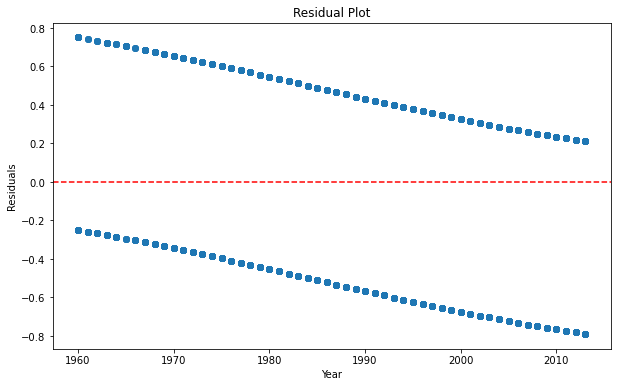

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X['construction_year'], residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [38]:
import numpy as np

# Generate a range of years for prediction
years_for_prediction = np.arange(year['construction_year'].min(), year['construction_year'].max() + 1)

# Create a new DataFrame for prediction
prediction_data = pd.DataFrame({'constant': 1, '_construction_year': years_for_prediction})

# Calculate predicted probabilities for each year
predicted_probs = model.predict(prediction_data)

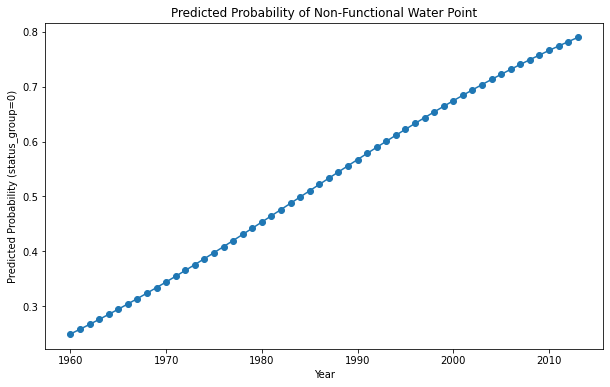

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(years_for_prediction, predicted_probs, marker='o')
plt.xlabel('Year')
plt.ylabel('Predicted Probability (status_group=0)')
plt.title('Predicted Probability of Non-Functional Water Point')
plt.show()

## All Data Clean

### Construction year

In [40]:
#Drop rows with construction year of 0
training_all.drop(training_all[training_all['construction_year'] == 0].index, inplace=True)
training_all['construction_year'].value_counts()

2008    2521
2010    2498
2009    2394
2000    2016
2007    1487
2006    1381
2003    1214
2011    1172
2004    1063
1978    1023
2002    1010
2012    1004
2005     946
1990     939
1999     926
1995     895
1998     869
1985     804
1980     757
1984     723
1982     700
1972     692
1994     682
1996     642
1974     640
1992     612
1997     533
1993     526
1988     501
2001     499
1983     467
1975     425
1986     407
1970     404
1976     379
1991     305
1989     303
1987     289
1981     222
1977     186
1973     184
1979     173
2013     165
1971     128
1960     102
1967      87
1963      84
1968      76
1969      59
1964      40
1962      29
1961      21
1965      19
1966      16
Name: construction_year, dtype: int64

### Installer

In [41]:
#For installer, filter out those with less than 500 count

In [42]:
# Calculate installer counts
installer_counts = training_all['installer'].value_counts()

# Identify installers with counts >= 500
installers_to_keep = installer_counts[installer_counts >= 500].index

# Filter the DataFrame based on installers to keep
training_all = training_all[training_all['installer'].isin(installers_to_keep)]


In [43]:
training_all.head()

id  amount_tsh date_recorded       funding_source  well_altitude  \
5    9944        20.0    2011-03-13  Mkinga Distric Coun              0   
11  50409       200.0    2013-02-18               Danida           1062   
15  61848         0.0    2011-08-04                Rudep           1645   
16  48451       500.0    2011-07-04               Unicef           1703   
17  58155         0.0    2011-09-04               Unicef           1656   

   installer  longitude   latitude        water_point_name            basin  \
5        DWE  39.172796  -4.765587                  Tajiri          Pangani   
11    DANIDA  35.770258 -10.574175        Kwa Alid Nchimbi       Lake Nyasa   
15       DWE  31.444121  -8.274962  Kwa Juvenal Ching'Ombe  Lake Tanganyika   
16       DWE  34.642439  -9.106185         Kwa John Mtenzi           Rufiji   
17       DWE  34.569266  -9.085515         Kwa Rose Chaula           Rufiji   

    ... water_quality quality_group      quantity  quantity_group  \
5   ...         salty         salty        enough          enough   
11  ...          soft          good  insufficient    insufficient   
15  ...          soft          good        enough          enough   
16  ...          soft          good           dry             dry   
17  ...          soft          good           dry             dry   

          source   source_type  source_class              waterpoint_type  \
5          other         other       unknown  communal standpipe multiple   
11  shallow well  shallow well   groundwater                    hand pump   
15   machine dbh      borehole   groundwater                    hand pump   
16         river    river/lake       surface           communal standpipe   
17         river    river/lake       surface           communal standpipe   

   waterpoint_type_group    status_group  
5     communal standpipe      functional  
11             hand pump      functional  
15             hand pump      functional  
16    communal standpipe  non functional  
17    communal standpipe  non functional  

[5 rows x 40 columns]

### Scheme management

In [44]:
# drop n/a
training_all.dropna(subset=['scheme_management'], inplace=True)

In [45]:
# drop "None" and "Other" values
training_all = training_all.loc[training_all['scheme_management'] != 'None']
training_all = training_all.loc[training_all['scheme_management'] != 'Other']

### Extraction type

In [46]:
training_all['extraction_type'].value_counts()

gravity                      10671
other                         1281
submersible                   1138
swn 80                         891
nira/tanira                    778
india mark ii                  528
mono                           348
afridev                        274
ksb                            122
other - swn 81                  44
india mark iii                   6
other - rope pump                6
other - play pump                3
other - mkulima/shinyanga        1
windmill                         1
Name: extraction_type, dtype: int64

In [47]:
# overwhelming majority of pumps have gravity as extraction type, so maybe not worth it to filter

### Management or management group

In [48]:
training_all['management'].value_counts()

vwc                 11467
water board          1466
wug                  1102
wua                   813
private operator      383
parastatal            338
water authority       323
other - school         99
other                  52
unknown                26
trust                  13
company                10
Name: management, dtype: int64

In [49]:
training_all['management_group'].value_counts()

user-group    14848
commercial      729
parastatal      338
other           151
unknown          26
Name: management_group, dtype: int64

In [50]:
training_all['installer'].value_counts()

DWE           9781
DANIDA        1319
Community     1124
Government     968
RWE            914
0              756
TCRS           620
CES            610
Name: installer, dtype: int64

### Quantity

In [51]:
training_all['quantity'].value_counts()

enough          9897
insufficient    4044
dry             1354
seasonal         666
unknown          131
Name: quantity, dtype: int64

In [52]:
training_all['quantity_group'].value_counts()

enough          9897
insufficient    4044
dry             1354
seasonal         666
unknown          131
Name: quantity_group, dtype: int64

In [53]:
# drop quantity_group column because it is a duplicate of quantity column 
training_all.drop(columns='quantity_group', inplace=True)

In [54]:
# drop unknown values from quantity column
training_all = training_all.loc[training_all['quantity'] != 'unknown']

### Source

In [55]:
training_all['source'].value_counts()

spring                  6861
river                   3703
shallow well            2366
machine dbh             2228
lake                     208
hand dtw                 188
rainwater harvesting     176
other                    123
dam                       93
unknown                   15
Name: source, dtype: int64

In [56]:
# drop unknown values from quantity column
training_all = training_all.loc[training_all['source'] != 'unknown']
training_all = training_all.loc[training_all['source'] != 'other']

### Waterpoint type

In [57]:
training_all['waterpoint_type'].value_counts()

communal standpipe             9850
hand pump                      2749
communal standpipe multiple    1570
other                          1407
improved spring                 206
cattle trough                    37
dam                               4
Name: waterpoint_type, dtype: int64

In [58]:
training_all['waterpoint_type_group'].value_counts()

communal standpipe    11420
hand pump              2749
other                  1407
improved spring         206
cattle trough            37
dam                       4
Name: waterpoint_type_group, dtype: int64

In [59]:
training_all['status_group'].value_counts()

functional        10237
non functional     5586
Name: status_group, dtype: int64

## All independent variables

### Chi squared test

In [62]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

alpha = 0.05
# List of variables to test
categorical_vars = ['waterpoint_type', 'installer', 'scheme_management', 'construction_year', 'extraction_type', 'management', 'quantity', 'source']

for var in categorical_vars:
    contingency_table = pd.crosstab(training_all['status_group'], training_all[var])
    
   
    degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
    
    critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)
    
    # chi^2 test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    if chi2_stat > critical_value:
        print(f"{var} and target are dependent")
    else:
        print(f"{var} and target are independent")


waterpoint_type and target are dependent
installer and target are dependent
scheme_management and target are dependent
construction_year and target are dependent
extraction_type and target are dependent
management and target are dependent
quantity and target are dependent
source and target are dependent


In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X = training_all[['waterpoint_type', 'installer', 'scheme_management', 'construction_year', 'extraction_type', 'management', 'quantity', 'source']]
y = training_all['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_features = encoder.fit_transform(X_train[['waterpoint_type', 'installer', 'scheme_management', 'extraction_type', 'management', 'quantity', 'source']])


In [66]:
X_train_numeric = X_train[['construction_year']]  # Replace with your numeric features
X_train_encoded = np.concatenate((X_train_numeric, encoded_features), axis=1)


In [67]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)


RandomForestClassifier(random_state=42)

In [68]:
encoded_features_test = encoder.transform(X_test[['waterpoint_type', 'installer', 'scheme_management', 'extraction_type', 'management', 'quantity', 'source']])


In [69]:
X_test_numeric = X_test[['construction_year']]  # Replace with your numeric features
X_test_encoded = np.concatenate((X_test_numeric, encoded_features_test), axis=1)


In [70]:
y_pred = rf_model.predict(X_test_encoded)


In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.837914691943128
Classification Report:
                 precision    recall  f1-score   support

    functional       0.84      0.92      0.88      1998
non functional       0.83      0.70      0.76      1167

      accuracy                           0.84      3165
     macro avg       0.84      0.81      0.82      3165
  weighted avg       0.84      0.84      0.83      3165

Confusion Matrix:
 [[1835  163]
 [ 350  817]]


In [78]:
print(accuracy)
print(report)
print(confusion_matrix)

0.837914691943128
                precision    recall  f1-score   support

    functional       0.84      0.92      0.88      1998
non functional       0.83      0.70      0.76      1167

      accuracy                           0.84      3165
     macro avg       0.84      0.81      0.82      3165
  weighted avg       0.84      0.84      0.83      3165

[[1835  163]
 [ 350  817]]
